Assignment #02 (Practice Stohastic Gradient Descent SDG)

Submitted by Wania Naeem, 22I-2369 of CS-Z (Robo)

The dataset is manually generated for price prediction of plots, by creating features like Area, Price. In this dataset, Area will be the feature (X) and Price will be the y. A simple linear regression model will be used to predict the price

need to check the button, they dont work.....

<p align="left">
  <a target="_parent" href="https://colab.research.google.com/github.com/Wania-n/ML_A-02_Price-Prediction/blob/main/22i-2369_ML_A2.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" height="30">
  </a>
  <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/Wania-n/ML_A-02_Price-Prediction/main/22i-2369_ML_A2.ipynb">
    <img src="https://kaggle.com/static/images/open-in-kaggle.svg" height="30">
  </a>
</p>

2. Manually creating the dataset and saving it

In [65]:
import numpy as np

# Making the randomness of number generation constant
np.random.seed(42)

# 500 records to make
instances = 400

# Generating the feature (X)
area = 700 * np.random.rand(instances, 1)

# Generating the price (y) using dot product to generate a column vector of 500 rows
price = 4 + 3 * area + np.random.randn(instances, 1) * 400

In [67]:
# Verifiying the features
print(area)

[[262.17808319]
 [665.50001449]
 [512.39575927]
 [419.06093894]
 [109.21304831]
 [109.19616424]
 [ 40.65852852]
 [606.32330204]
 [420.78050822]
 [495.65080446]
 [ 14.40914601]
 [678.93689651]
 [582.70984856]
 [148.63737747]
 [127.27747704]
 [128.3831569 ]
 [212.96957007]
 [367.32950214]
 [302.36151305]
 [203.86039814]
 [428.29702631]
 [ 97.64570246]
 [204.50125397]
 [256.45329031]
 [319.24898895]
 [549.62317298]
 [139.77164751]
 [359.96410689]
 [414.6901982 ]
 [ 32.5152889 ]
 [425.28139633]
 [119.36688658]
 [ 45.53611509]
 [664.21987608]
 [675.94242315]
 [565.87814368]
 [213.22963842]
 [ 68.3704798 ]
 [478.96311856]
 [308.10674562]
 [ 85.42676439]
 [346.62383708]
 [ 24.07196478]
 [636.52428146]
 [181.14598712]
 [463.76559905]
 [218.19775326]
 [364.04761482]
 [382.69719554]
 [129.39811887]
 [678.70923944]
 [542.59297635]
 [657.64925909]
 [626.3791453 ]
 [418.52998517]
 [645.31196452]
 [ 61.94475144]
 [137.18800369]
 [ 31.65910224]
 [227.73123153]
 [272.07410278]
 [189.94432224]
 [580.11

In [68]:
# Verifying the Price (y)
print(price)

[[ 1312.72577244]
 [ 2008.90158011]
 [ 1813.96846632]
 [ 1137.07611418]
 [  461.30568592]
 [  279.53127096]
 [  164.77397155]
 [ 2061.0327163 ]
 [  939.05325137]
 [ 2327.90732365]
 [ -355.17951458]
 [ 1555.13524443]
 [ 2215.37389508]
 [  766.57721001]
 [  635.48035796]
 [  640.4876744 ]
 [  638.01000108]
 [  747.08675783]
 [  941.40636243]
 [  344.71650981]
 [ 1678.93897228]
 [  238.11415477]
 [  287.30488321]
 [  644.80553426]
 [ 1126.91954857]
 [ 1427.3796978 ]
 [   94.42678431]
 [ 1181.36720527]
 [ 1346.05722305]
 [ -101.23140344]
 [ 1091.42886675]
 [  454.92063469]
 [ -438.62539133]
 [ 1433.67411848]
 [ 1744.44958096]
 [ 1616.25557036]
 [  768.0519415 ]
 [  799.25392619]
 [ 1783.95320496]
 [  864.34482487]
 [  252.67381001]
 [  642.85976538]
 [   68.81063995]
 [ 1798.1093888 ]
 [  676.5253855 ]
 [ 1064.40441972]
 [  866.33186548]
 [ 1709.23840967]
 [ 1108.58752724]
 [  552.87904544]
 [ 2316.18531499]
 [ 1471.2907403 ]
 [ 2066.58477001]
 [ 1888.17439621]
 [ 1298.66039492]
 [ 1630.73

3. Plotting the Dataset

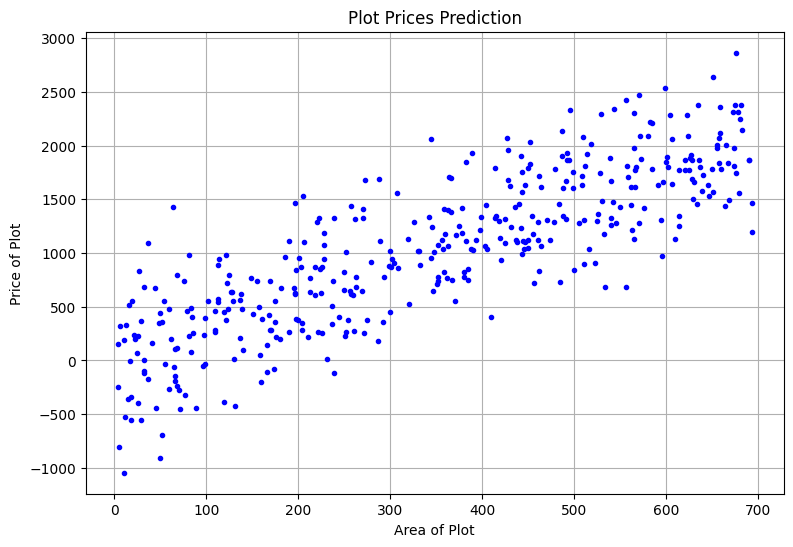

In [69]:
# Plotting the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(area, price, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.xlabel("Area of Plot")
plt.ylabel("Price of Plot", rotation=90)
plt.grid()
plt.title("Plot Prices Prediction")
plt.savefig("Plot_Price_Prediction-Dataset")
plt.show()

4. Finding the best weights using the normal equation

In [171]:
# Adding a dummy feature (The bias one)

# area  --> X without the bias
# price --> y

# Using the normal equation

from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(area)
theta_best = np.linalg.inv(X.T @ X) @ X.T @ price

# These are the best weights to get from training the model
print(theta_best)


[[1.99440631]
 [2.9765051 ]]


5. Deriving the Gradient Update Rule and using the Mean Squared Error Loss

For using this, I will implement SGD from scratch to use the gradient update rule and calculating the mean squared error loss, after every epoch

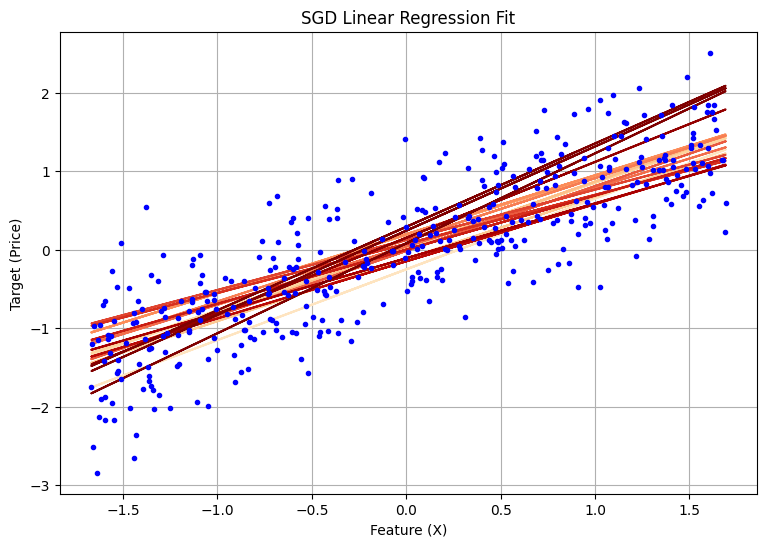

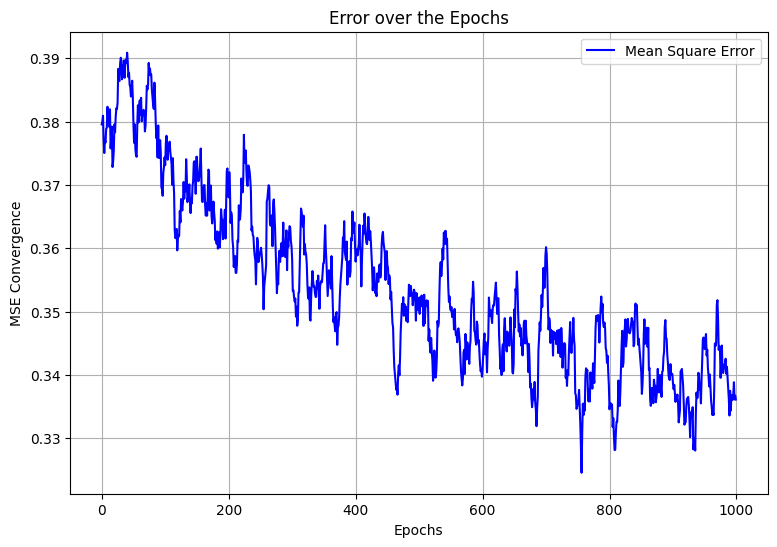

In [187]:
# Using the same dataset
# X and price

import matplotlib as mpl

np.random.seed(42)

n_shown = 20
plt.figure(figsize=(9, 6))

# Making a function for SGD
def Manual_SGD(X, y, learning_rate=0.1, decay=0.001, epochs=1000):
    data_size = len(y)
    theta = np.random.uniform(-1, 1, (2,1))
    theta_history = [theta.copy()]
    meansq_history = []

    for epoch in range(epochs):
        total_loss = 0
        lr = learning_rate / (1 + decay * epoch)

        for i in range(data_size):
            if epoch == 0 and i < n_shown:
                y_predict = X @ theta
                color = mpl.colors.to_hex(plt.cm.OrRd(i / n_shown + 0.15))
                plt.plot(X[:, 1], y_predict, color=color)

            random_index = np.random.randint(data_size)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Calculating the Mean Square Error Loss
            error = xi.dot(theta) - yi
            meansq_loss = (error ** 2).mean()
            total_loss += meansq_loss

            # Calculating the gradient updates
            gradients = 2 * xi.T @ (error)
            theta -= lr * gradients
            theta_history.append(theta.copy())

        meansq_history.append(total_loss / data_size)

    return theta, theta_history, meansq_history

# Scaling the values
X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
price_scaled = (price - price.mean()) / price.std()

# Calling the function
theta_manualSGD, history_SGD, meansq_SGD = Manual_SGD(X, price_scaled)

plt.plot(X[:, 1], price_scaled, "b.")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Price)")
plt.title("SGD Linear Regression Fit")
plt.grid()
plt.savefig("sgd_plot.png")
plt.show()

# For smoothing out the error line
def smooth_curve(values, alpha=0.1):
    smoothed = []
    for i in range(len(values)):
        if i == 0:
            smoothed.append(values[i])
        else:
            smoothed.append(alpha * values[i] + (1 - alpha) * smoothed[-1])
    return np.array(smoothed)

# Plotting the Error at every epoch
plt.figure(figsize=(9,6))
plt.plot(smooth_curve(meansq_SGD), label="Mean Square Error", color="blue")
plt.xlabel("Epochs")
plt.ylabel("MSE Convergence")
plt.title("Error over the Epochs")
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Checking the weights
print(theta_manualSGD)

[[0.20828888]
 [0.82775604]]


6. Now training model using the scikit library

Mean Squared Error: 160538.84


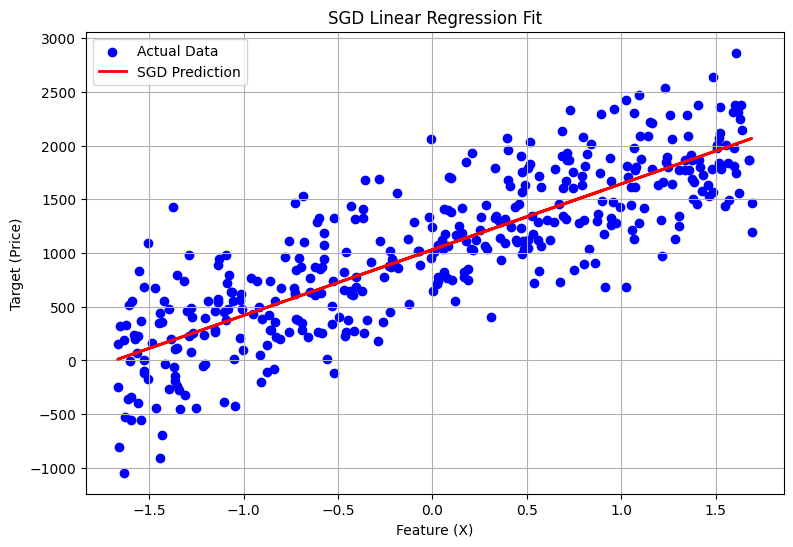

In [201]:
# SGD using scikit learn library

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Scale X values and the y too
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
price_scaled = scaler_y.fit_transform(price.reshape(-1, 1)).ravel()

# Train the model
builtin_SGD = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
builtin_SGD.fit(X_scaled, price_scaled.ravel())

# Get the predicted price
y_pred_scaled = builtin_SGD.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Display the resulting error
mse = mean_squared_error(price, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(9,6))
plt.scatter(X[:,1], price, color="blue", label="Actual Data")
plt.plot(X[:,1], y_pred, color="red", linewidth=2, label="SGD Prediction")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Price)")
plt.title("SGD Linear Regression Fit")
plt.legend()
plt.grid()
plt.show()


In [193]:
# Checking the weights
builtin_SGD.intercept_, builtin_SGD.coef_

(array([-0.00028059]), array([0.        , 0.83727387]))

7. Training Mini Batch model

Mean Squared Error: 160539.51


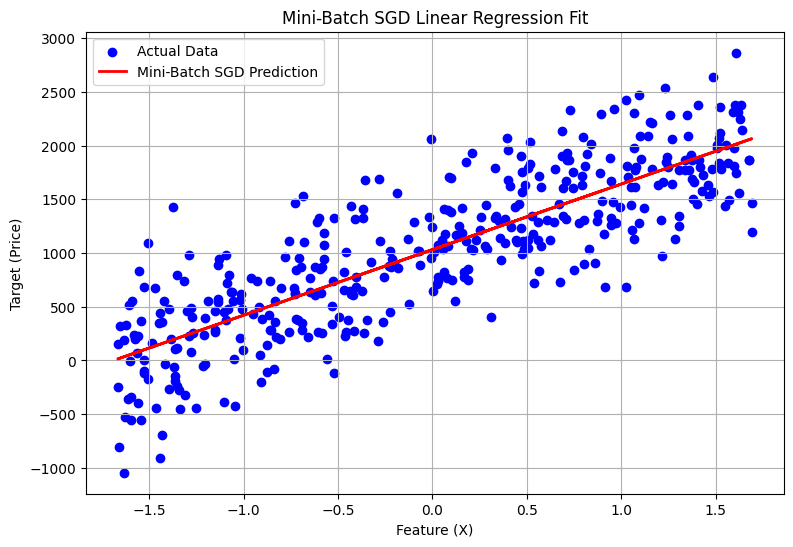

In [198]:
# Now training the model using mini-batch

# Scale X and price
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
price_scaled = scaler_y.fit_transform(price.reshape(-1, 1)).ravel()

# Setting the batch size
batch_size = 10  
n_epochs = 1000
n_samples = X_scaled.shape[0]

builtin_SGD = SGDRegressor(penalty=None, eta0=0.005, learning_rate="invscaling", power_t=0.5, shuffle=True, random_state=42)

# Training in batches
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(n_samples)
    for i in range(0, n_samples, batch_size):
        batch_indices = shuffled_indices[i:i + batch_size]
        X_batch = X_scaled[batch_indices]
        y_batch = price_scaled[batch_indices]
        builtin_SGD.partial_fit(X_batch, y_batch)

# Get the predicted price
y_pred_scaled = builtin_SGD.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Display the resulting error
mse = mean_squared_error(price, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot results
plt.figure(figsize=(9,6))
plt.scatter(X[:,1], price, color="blue", label="Actual Data")
plt.plot(X[:,1], y_pred, color="red", linewidth=2, label="Mini-Batch SGD Prediction")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Price)")
plt.title("Mini-Batch SGD Linear Regression Fit")
plt.legend()
plt.grid()
plt.show()


In [195]:
# Checking the weights
builtin_SGD.intercept_, builtin_SGD.coef_

(array([0.00137931]), array([0.        , 0.63055938]))

8. Training the model with batch data picking

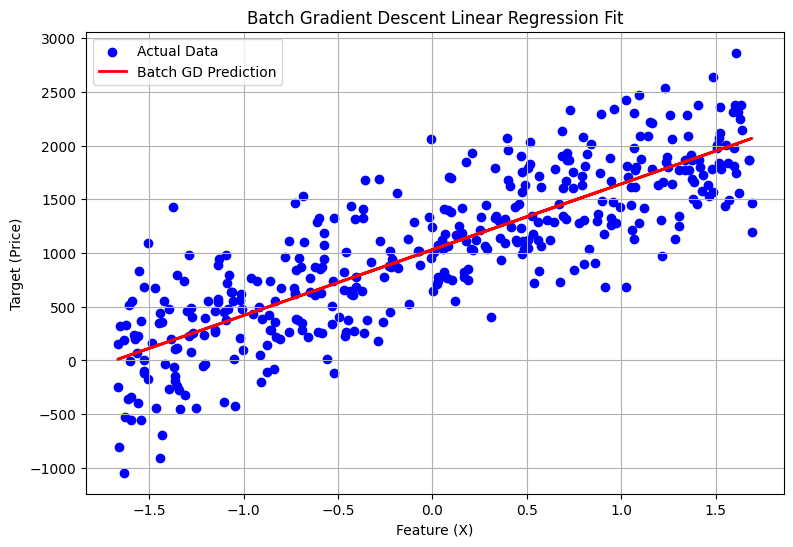

Optimized Weights: [-5.62287529e-01  6.11291408e+02  6.11291408e+02]


In [212]:
# Training the model using batch processing

# Standardize X and y for stability
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
price_scaled = scaler_y.fit_transform(price.reshape(-1, 1))
m = len(X_scaled)

# Batch Gradient Descent Function
def batch_gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    theta = np.random.randn(X.shape[1], 1)  
    cost_history = []

    for epoch in range(epochs):
        gradients = (2 / m) * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients  
        cost = (1/m) * np.sum((X @ theta - y) ** 2) 
        cost_history.append(cost)

    return theta, cost_history

# Train the model
theta_bgd, cost_history = batch_gradient_descent(X_scaled, price_scaled, learning_rate=0.1, epochs=1000)

# Plotting the graph
plt.figure(figsize=(9, 6))
plt.scatter(X[:,1], price, color="blue", label="Actual Data")
plt.plot(X[:,1], y_pred, color="red", linewidth=2, label="Batch GD Prediction")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Price)")
plt.title("Batch Gradient Descent Linear Regression Fit")
plt.legend()
plt.grid()
plt.show()

theta_bgd_original = np.vstack((theta_bgd[0], (theta_bgd[1:] * scaler_y.scale_[0] / scaler_X.scale_).reshape(-1,1)))
print("Optimized Weights:", theta_bgd_original.ravel())
